<a href="https://colab.research.google.com/github/JeffSoledade/DataScience_challenge1/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
url5 = "https://github.com/JeffSoledade/DataScience_challenge1/raw/main/base-de-dados-challenge-1/relatorio.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
relatorio = pd.read_csv(url5)

## Dados em painel

In [ ]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Funções

In [ ]:
# 1. Grafico faturamento por loja
def gerar_grafico_faturamento_loja(lojas_dados):
    """
    Gera um gráfico de barras com o faturamento total de cada loja.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    valores_faturamento = []

    for loja, nome_loja in lojas_dados:
        nomes_lojas.append(nome_loja)
        valores_faturamento.append(loja['Preço'].sum())

    plt.figure(figsize=(13, 4))
    plt.bar(nomes_lojas, valores_faturamento, color= ['#FFB200', '#EB5B00', '#D91656', '#640D5F'])
    plt.title('Faturamento por Loja', fontsize=18, color= '#001F3F', y=1.08)
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color= 'gray')
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    # Adicionando os valores acima das barras
    for i, valor in enumerate(valores_faturamento):
      plt.text(i, valor + 500, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9, color= '#001F3F')





# 2. Grafico categoria por loja
def gerar_grafico_categoria_por_loja(lojas_dados):
    """
    Gera um gráfico de barras horizontais com as vendas por categoria de produto,
    comparando entre diferentes lojas.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    # Criar um DataFrame consolidado com todas as categorias e lojas
    categorias = set()
    for loja, _ in lojas_dados:
        categorias.update(loja['Categoria do Produto'].unique())

    categorias = sorted(categorias)

    # Preparar os dados para o gráfico
    dados_grafico = {}
    for loja, nome_loja in lojas_dados:
        categoria_por_loja = loja.groupby('Categoria do Produto')['Preço'].sum()
        dados_grafico[nome_loja] = [categoria_por_loja.get(cat, 0) for cat in categorias]


    plt.figure(figsize=(13, 8))
    cores = ['#FFB200', '#EB5B00', '#D91656', '#640D5F']
    bar_width = 0.21
    posicoes = range(len(categorias))


    for i, (nome_loja, vendas) in enumerate(dados_grafico.items()):
        plt.barh(
            [p + i * bar_width for p in posicoes],
            vendas,
            height=bar_width,
            label=nome_loja,
            color=cores[i]
        )

    plt.title('Análise de Vendas: Categorias x Lojas', fontsize=18, color= '#001F3F', y=1.08)
    plt.yticks([p + bar_width * (len(lojas_dados)-1)/2 for p in posicoes], categorias)
    plt.legend()
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, axis='x')

    # Adicionar valores nas barras
    for i, (nome_loja, vendas) in enumerate(dados_grafico.items()):
        for j, valor in enumerate(vendas):
            if valor > 0:
                plt.text(
                    valor + 1000,
                    j + i * bar_width,
                    f'R$ {valor:,.2f}',
                    va='center',
                    fontsize=8,
                    color= '#001F3F'
                )

    plt.tight_layout()
    plt.savefig('categoria_por_loja.png', dpi=300, bbox_inches='tight')





# 3. Grafico receita por categoria
def gerar_grafico_rosca_receita_por_categoria(lojas_dados):
    """
    Gera um gráfico de rosca (donut chart) com o valor percentual de receita por categoria de produto,
    consolidando os dados de todas as lojas. A legenda mostra as categorias com suas cores
    e respectivos valores, e os percentuais são exibidos no gráfico.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    # Consolidar todas as categorias e somar as vendas
    categorias_vendas = {}

    for loja, _ in lojas_dados:
        for _, row in loja.iterrows():
            categoria = row['Categoria do Produto']
            preco = row['Preço']
            if categoria in categorias_vendas:
                categorias_vendas[categoria] += preco
            else:
                categorias_vendas[categoria] = preco

    # Ordenar categorias por valor de venda (decrescente)
    categorias_ordenadas = sorted(categorias_vendas.items(), key=lambda x: x[1], reverse=True)
    categorias = [item[0] for item in categorias_ordenadas]
    vendas = [item[1] for item in categorias_ordenadas]
    total_vendas = sum(vendas)
    percentuais = [v/total_vendas*100 for v in vendas]

    # Configurações do gráfico
    cores = ['#FFB200', '#EB5B00', '#D91656', '#640D5F', '#0C1844', '#0D92F4', '#7ED4AD', '#D9ABAB']
    explode = [0.02] * len(categorias)  # Pequena separação entre as fatias

    plt.figure(figsize=(13, 5))

    # Criar o gráfico de pizza com um buraco no meio (rosca)
    wedges, texts, autotexts = plt.pie(
        vendas,
        labels=None,  # Sem labels no gráfico
        colors=cores[:len(categorias)],
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'),  # width controla o tamanho do buraco
        autopct=lambda p: f'{p:.1f}%',  # Mostra percentuais com 1 casa decimal
        pctdistance=0.40,  # Posição dos percentuais (0.8 = 80% do raio)
        explode=None,
    )

    # Estilizar os textos dos percentuais
    for autotext in autotexts:
        autotext.set_color('white')  # Cor do texto dos percentuais
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')

    # Adicionar um círculo no centro para completar o efeito rosca
    centre_circle = plt.Circle((0, 0), 0.3, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Adicionar informação do total no centro
    plt.text(0, 0, f'Total\nR$ {total_vendas:,.2f}',
             ha='center', va='center',
             fontsize=12, fontweight='bold', color='#001F3F')

    # Criar labels para a legenda com os valores formatados
    legend_labels = [f'{cat} - {perc:.1f}%'
                    for cat, val, perc in zip(categorias, vendas, percentuais)]

    # Adicionar legenda com as categorias, percentuais e cores respectivas
    plt.legend(
        wedges,
        legend_labels,
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=10,
    )

    plt.axis('equal')  # Assegura que o gráfico fique circular
    plt.suptitle('Percentual de receita por Categoria',
             fontsize=18, color='#001F3F', y=1.03)
    plt.tight_layout()
    plt.savefig('receita_por_categoria_rosca.png', dpi=300, bbox_inches='tight')




# 4. Grafico média de avaliação
def gerar_grafico_avaliacao_media(lojas_dados):
    """
    Gera um gráfico de pontos com a avaliação média de cada loja e uma linha média pontilhada.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    medias_avaliacao = []

    for loja, nome_loja in lojas_dados:
        nomes_lojas.append(nome_loja)
        medias_avaliacao.append(loja['Avaliação da compra'].mean())

    media_geral = sum(medias_avaliacao) / len(medias_avaliacao)

    plt.figure(figsize=(13, 5))

    # Gráfico de pontos
    plt.scatter(nomes_lojas, medias_avaliacao, color=['#FFB200', '#EB5B00', '#D91656', '#640D5F'],
                s=400,)

    # Linha média pontilhada
    plt.axhline(y=media_geral, color='green', linestyle='--', linewidth=1.5,
                label=f'Média Geral: {media_geral:.2f}')

    plt.title('Pontuação Média de Avaliação por loja', fontsize=18, color='#001F3F', y=1.08)
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.legend()
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'






# 5. Grafico vendas produtos
def gerar_grafico_vendas_produto(lojas_dados):
    """
    Gera um gráfico de barras com a quantidade de vendas por produto.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados de vendas com coluna 'Produto'.
    """
    # Contar a ocorrência de cada produto
    vendas_por_produto = (loja['Produto'].value_counts())

    produtos = vendas_por_produto.index.tolist()
    quantidades = vendas_por_produto.values.tolist()

    # Definir cores e legendas com base nas quantidades
    cores = []
    legendas_cores = {
        '#D91656': 'Menos de 40 vendas',
        '#FFB200': '40-49 vendas',
        '#89AC46': '50-59 vendas',
        '#399918': '60+ vendas'
    }

    for qtd in quantidades:
        if qtd < 40:
            cores.append('#D91656')  # Vermelho
        elif qtd < 50:
            cores.append('#FFB200')  # Amarelo
        elif qtd < 60:
            cores.append('#89AC46')  # Verde claro
        else:
            cores.append('#399918')  # Verde

    plt.figure(figsize=(13, 6))
    plt.bar(produtos, quantidades, color=cores)
    plt.title('Quantidade de Vendas por Produto', fontsize=18, color='#001F3F', y=1.08)
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    # Criar elementos para a legenda
    patches = [mpatches.Patch(color=color, label=label)
               for color, label in legendas_cores.items()]

    plt.legend(
        handles=patches,
        loc="upper left",
        bbox_to_anchor=(1, 1),
        title_fontsize=12,
        fontsize=10
    )




# 6. Gráfico receita por produto (soma de preços)
def gerar_grafico_soma_precos_produto(lojas_dados):
    """
    Gera um gráfico de barras com a soma dos preços por produto.

    Parâmetros:
    lojas_dados (list): Lista de tuplas contendo (DataFrame, nome_loja) para cada loja.
    """
    # Concatenar todos os DataFrames das lojas
    df_total = pd.concat([loja[0] for loja in lojas_dados])

    # Agrupar por produto e somar os preços
    soma_por_produto = df_total.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

    produtos = soma_por_produto.index.tolist()
    valores = soma_por_produto.values.tolist()

    # Definir cores e legendas com base nos valores
    cores = []
    legendas_cores = []
    for valor in valores:
        if valor < 30000:
            cores.append('#D91656')  # Vermelho
            legendas_cores.append('Receita < 30k')
        elif valor < 100000:
            cores.append('#FFB200')  # Amarelo
            legendas_cores.append('30k ≤ Receita < 100k')
        elif valor < 300000:
            cores.append('#89AC46')  # Verde claro
            legendas_cores.append('100k ≤ Receita < 300k')
        else:
            cores.append('#399918')  # Verde
            legendas_cores.append('Receita ≥ 300k')

    plt.figure(figsize=(13, 6))
    bars = plt.bar(produtos, valores, color=cores)

    # Criar elementos de legenda únicos
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#D91656', label='Abaixo de 30k'),
        Patch(facecolor='#FFB200', label='30k - 99k'),
        Patch(facecolor='#89AC46', label='100k - 299k'),
        Patch(facecolor='#399918', label='Acima de 300k')
    ]

    plt.title('Receita por Produto', fontsize=18, color='#001F3F', y=1.08)
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Adicionar legenda
    plt.legend(
        handles=legend_elements,
        loc="upper left",
        bbox_to_anchor=(1, 1),
        title_fontsize=12,
        fontsize=10,
    )

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'



# 7. Gráfico de frete médio por loja
def gerar_grafico_frete_medio(lojas_dados):
    """
    Gera um gráfico de pontos com o frete médio de cada loja e uma linha média pontilhada.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    medias_frete = []

    for loja, nome_loja in lojas_dados:
        nomes_lojas.append(nome_loja)
        medias_frete.append(loja['Frete'].mean())

    media_geral = sum(medias_frete) / len(medias_frete)

    plt.figure(figsize=(13, 5))

    # Gráfico de pontos
    plt.scatter(nomes_lojas, medias_frete, color=['#FFB200', '#EB5B00', '#D91656', '#640D5F'],
                s=400)

    # Linha média pontilhada
    plt.axhline(y=media_geral, color='green', linestyle='--', linewidth=1.5,
                label=f'Média Geral: R${media_geral:.2f}')

    plt.title('Frete Médio por Loja', fontsize=18, color='#001F3F', y=1.10)
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.legend()
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    # Adicionando os valores acima dos pontos
    for i, valor in enumerate(medias_frete):
        plt.text(i, valor + 0.25, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=9, color='#001F3F')



# 8. Grafico de produto mais vendido por loja
def gerar_grafico_produto_mais_vendido(lojas_dados):
    """
    Gera um gráfico de barras com o produto mais vendido em cada loja.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    produtos_mais_vendidos = []
    contagem_produtos = []

    for loja, nome_loja in lojas_dados:
        # Conta a ocorrência de cada produto
        contagem = Counter(loja['Produto'])
        # Pega o produto mais comum
        produto_mais_vendido, quantidade = contagem.most_common(1)[0]

        nomes_lojas.append(nome_loja)
        produtos_mais_vendidos.append(produto_mais_vendido)
        contagem_produtos.append(quantidade)

    plt.figure(figsize=(13, 4))
    bars = plt.bar(nomes_lojas, contagem_produtos, color=['#FFB200', '#EB5B00', '#D91656', '#640D5F'])
    plt.title('Produto Mais Vendido por Loja', fontsize=18, color='#001F3F', y=1.08)
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    # Adicionando os valores e nomes dos produtos acima das barras
    for i, (valor, produto) in enumerate(zip(contagem_produtos, produtos_mais_vendidos)):
        plt.text(i, valor + 0.5, f'{valor} un\n{produto}',
                ha='center', va='bottom', fontsize=9, color='#001F3F')



# 9. Grafico de produto menos vendido por loja
def gerar_grafico_produto_menos_vendido(lojas_dados):
    """
    Gera um gráfico de barras com o produto menos vendido em cada loja.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    produtos_menos_vendidos = []
    contagem_produtos = []

    for loja, nome_loja in lojas_dados:
        # Conta a ocorrência de cada produto
        contagem = Counter(loja['Produto'])
        # Pega o produto menos comum (o último da lista ordenada)
        produto_menos_vendido, quantidade = contagem.most_common()[-1]

        nomes_lojas.append(nome_loja)
        produtos_menos_vendidos.append(produto_menos_vendido)
        contagem_produtos.append(quantidade)

    plt.figure(figsize=(13, 4))
    bars = plt.bar(nomes_lojas, contagem_produtos, color=['#FFB200', '#EB5B00', '#D91656', '#640D5F'])
    plt.title('Produto Menos Vendido por Loja', fontsize=18, color='#001F3F', y=1.08)
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    # Adicionando os valores e nomes dos produtos acima das barras
    for i, (valor, produto) in enumerate(zip(contagem_produtos, produtos_menos_vendidos)):
        plt.text(i, valor + 0.5, f'{valor} un\n{produto}',
                ha='center', va='bottom', fontsize=9, color='#001F3F')




def gerar_grafico_categoria_mais_vendida(lojas_dados):
    """
    Gera um gráfico de barras com a categoria mais vendida em cada loja.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    categorias_mais_vendidas = []
    contagem_categorias = []

    for loja, nome_loja in lojas_dados:
        # Conta a ocorrência de cada categoria
        contagem = Counter(loja['Categoria do Produto'])
        # Pega a categoria mais comum
        categoria_mais_vendida, quantidade = contagem.most_common(1)[0]

        nomes_lojas.append(nome_loja)
        categorias_mais_vendidas.append(categoria_mais_vendida)
        contagem_categorias.append(quantidade)

    plt.figure(figsize=(13, 4))
    bars = plt.bar(nomes_lojas, contagem_categorias, color=['#FFB200', '#EB5B00', '#D91656', '#640D5F'])
    plt.title('Categoria Mais Vendida por Loja', fontsize=18, color='#001F3F', y=1.08)
    plt.ylabel('Quantidade Vendida')
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    # Adicionando os valores e nomes das categorias acima das barras
    for i, (valor, categoria) in enumerate(zip(contagem_categorias, categorias_mais_vendidas)):
        plt.text(i, valor + 0.5, f'{valor} un\n{categoria}',
                ha='center', va='bottom', fontsize=9, color='#001F3F')



plt.show()
lojas = [(loja, 'Loja1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

#1. Análise do faturamento

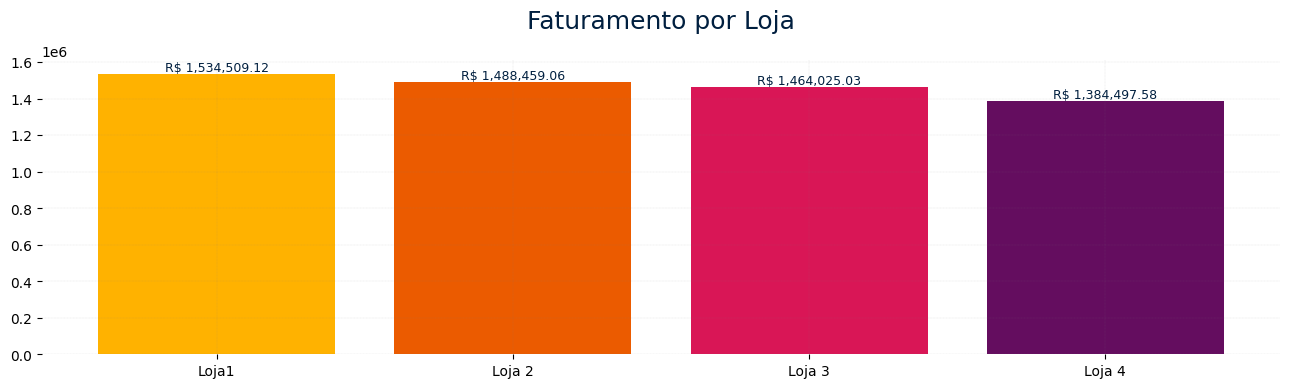

In [ ]:
gerar_grafico_faturamento_loja(lojas)

#2. Análise por categoria

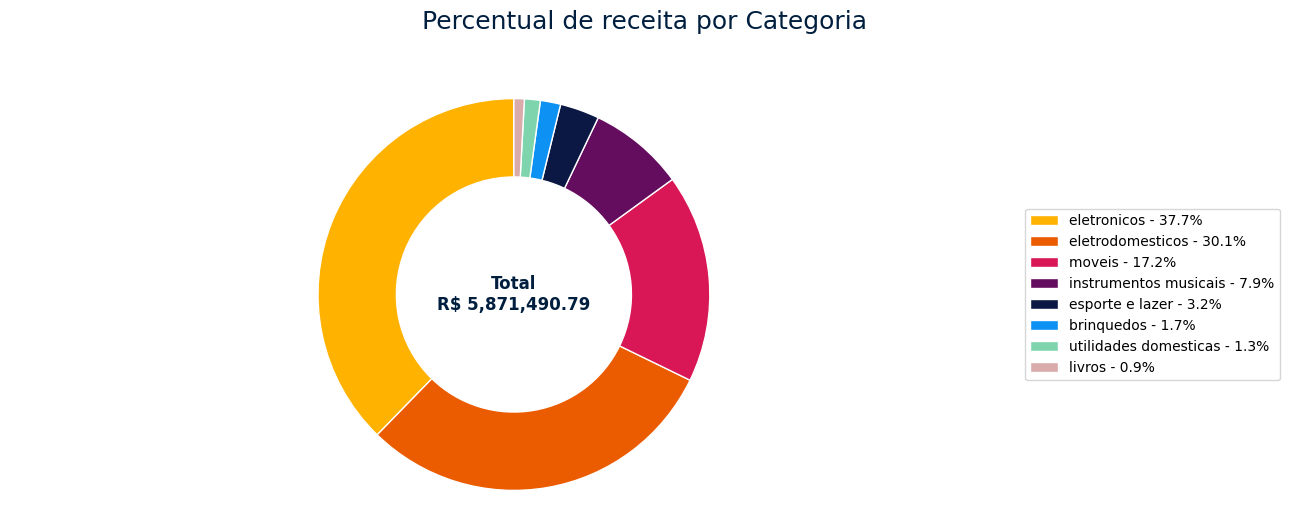

In [ ]:
gerar_grafico_rosca_receita_por_categoria(lojas)

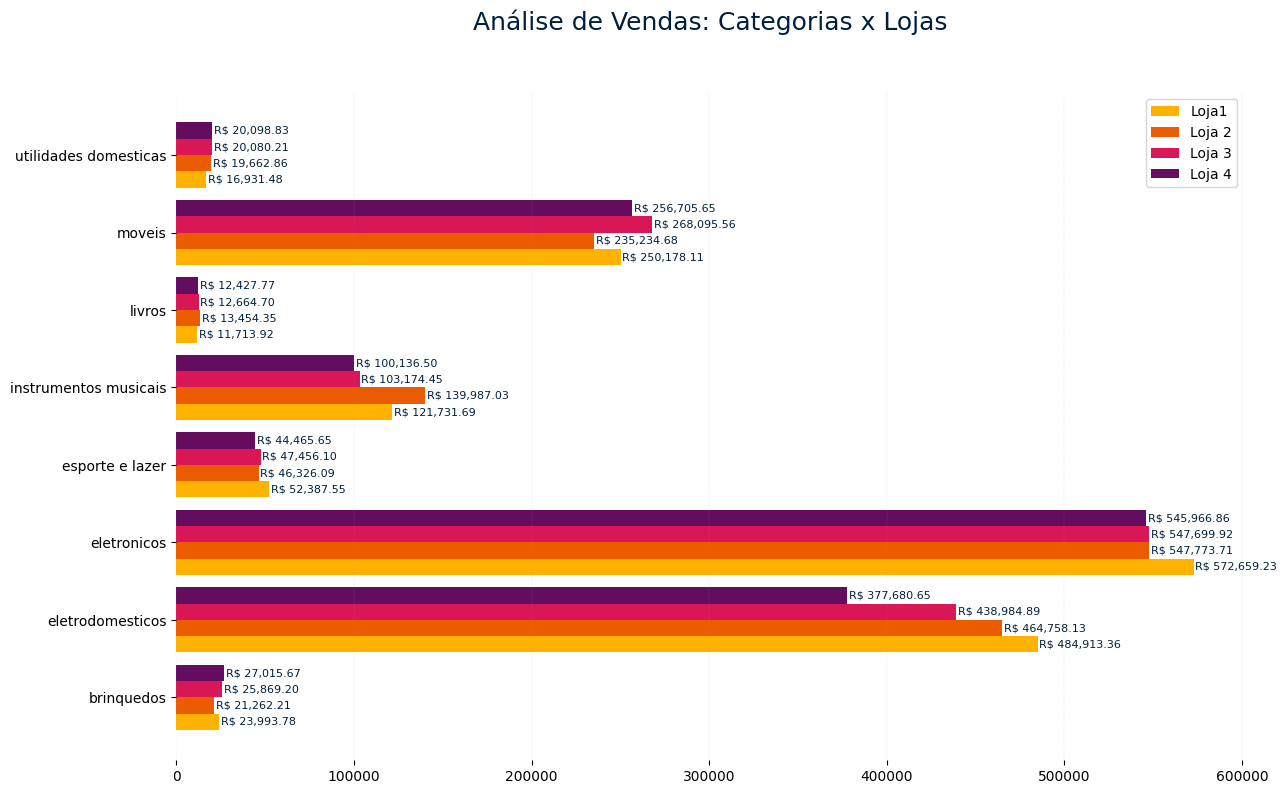

In [ ]:
gerar_grafico_categoria_por_loja(lojas)

# 3. Média de Avaliação das Lojas

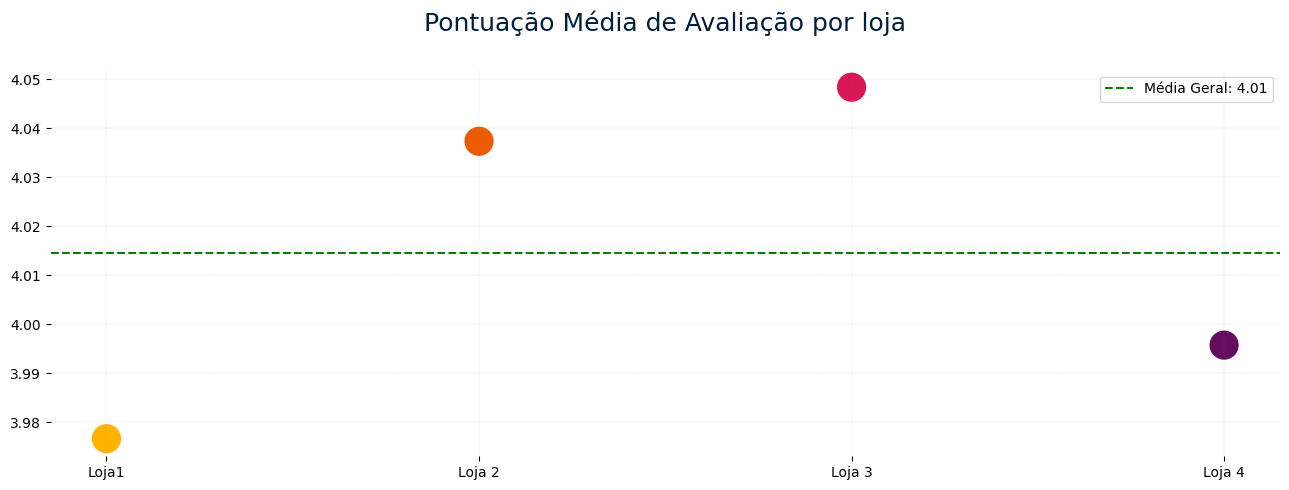

In [ ]:
gerar_grafico_avaliacao_media(lojas)

# 4. Produtos Mais e Menos Vendidos

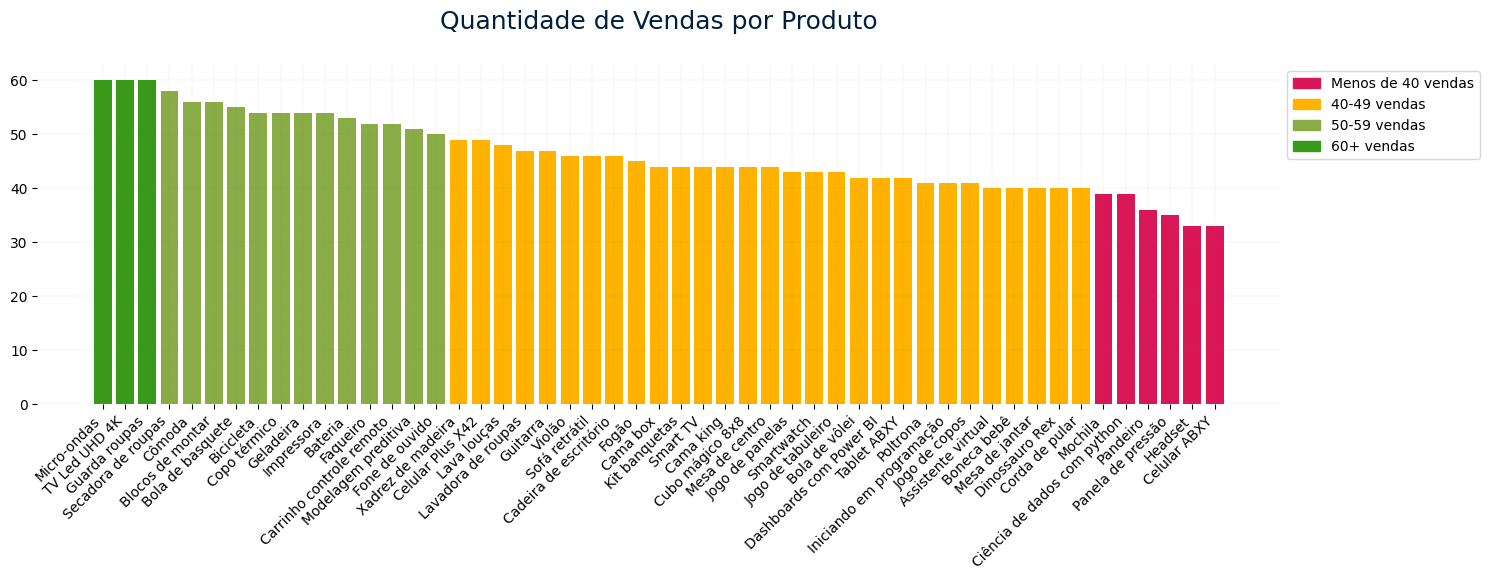

In [ ]:
gerar_grafico_vendas_produto(lojas)

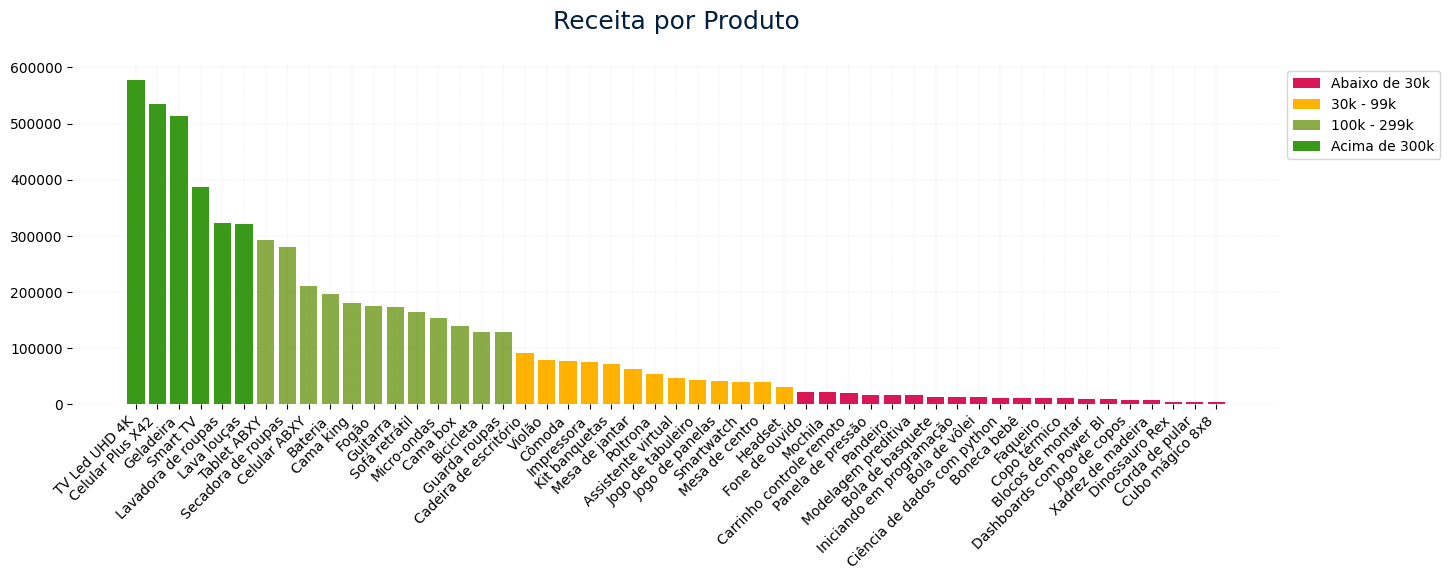

In [ ]:
gerar_grafico_soma_precos_produto(lojas)

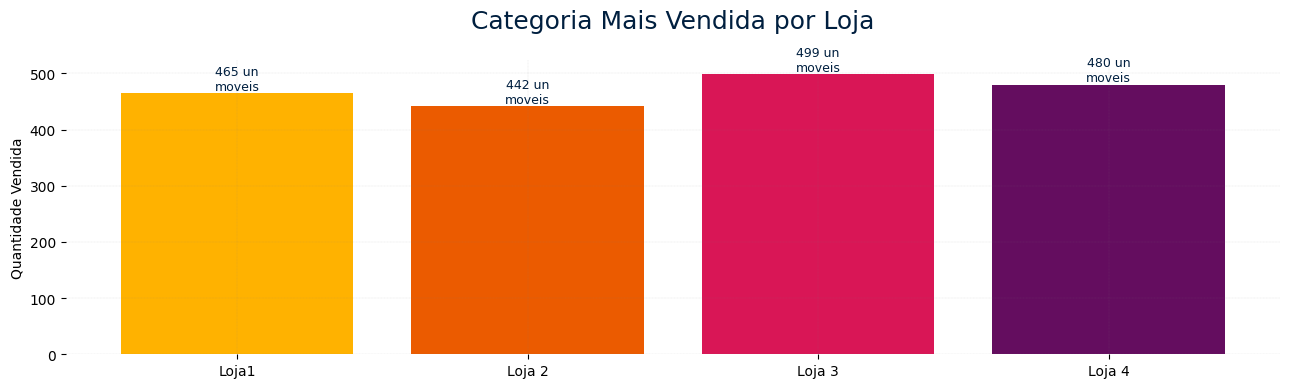

In [ ]:
gerar_grafico_categoria_mais_vendida(lojas)

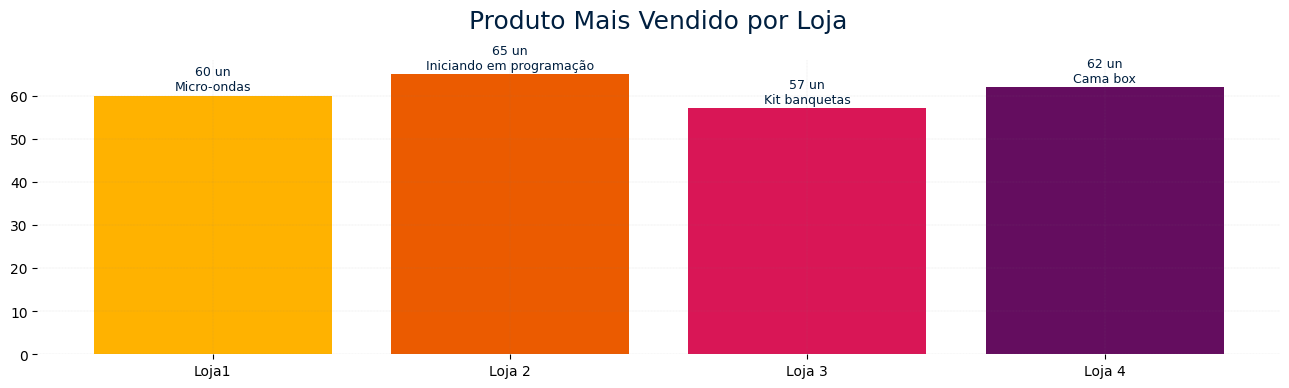

In [ ]:
gerar_grafico_produto_mais_vendido(lojas)

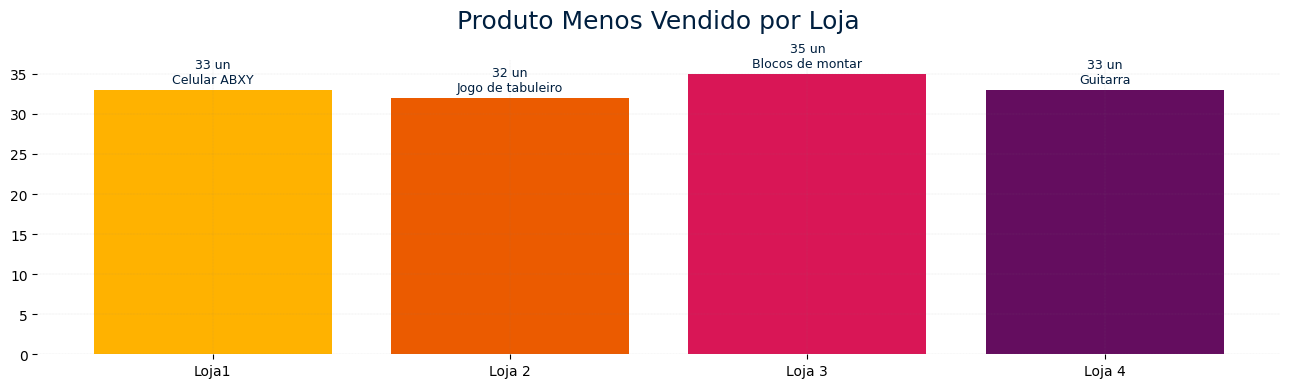

In [ ]:
gerar_grafico_produto_menos_vendido(lojas)

# 5. Frete Médio por Loja


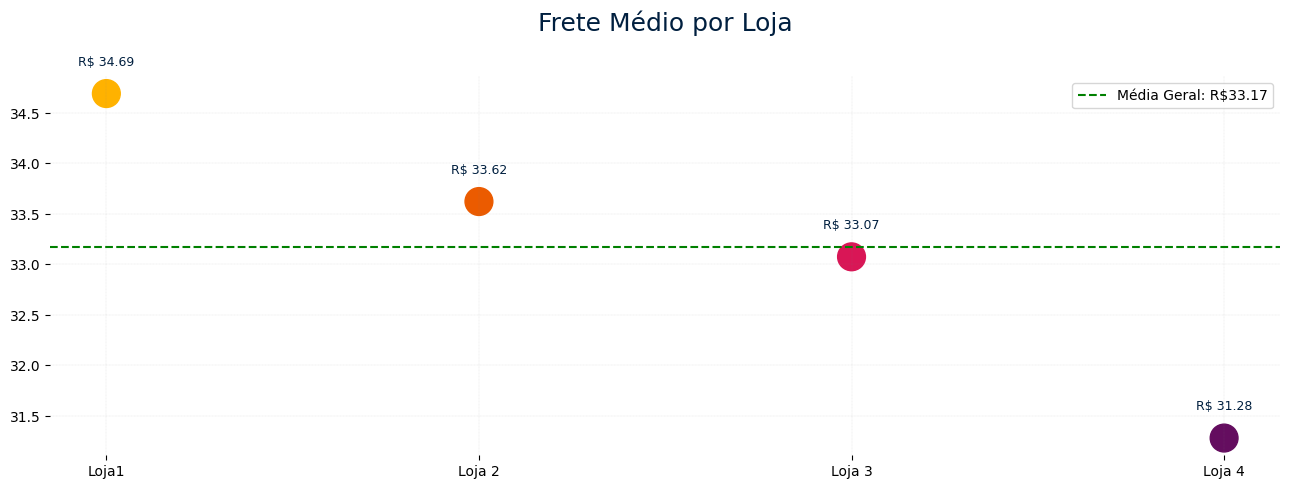

In [ ]:
gerar_grafico_frete_medio(lojas)

# 6. Conclusão

Para determinar qual empresa mais indicada à ser vendida devemos primeiro verificar seus pontos fracos e fortes e fazer uma análise através destes para determinar qual terá um custo maior para estruturação e correção dos processos.

In [2]:
relatorio.head()

,Lojas,Faturamento,Categoria mais vendida,Produto mais vendido,Produto menos vendido,Média de avaliação,Média de frete,Ponto forte,Ponto fraco
0,Loja 1,1534509.12,Móveis,Micro-ondas,Celular ABXY,3.98,34.69,Maior faturamento,Frete alto e melhor avaliação
1,Loja 2,1488459.06,Móveis,Iniciando em programação,Jogo de Tabuleiro,4.04,33.62,Bom equilíbrio geral,Baixa margem de retorno?
2,Loja 3,1464025.03,Móveis,Kit banquetas,Blocos de montar,4.05,33.07,Melhor avaliação e boa média,Faturamento um pouco menor
3,Loja 4,1384497.58,Móveis,Cama box,Guitarra,4.00,31.28,Menor frete,Faturamento mais baixo


De acordo com a tabela acima, podemos considerar quê:




1. Loja 1


Prós: Maior faturamento indica grande volume   de vendas.


Contras: Frete mais caro e avaliação mais baixa podem afetar a experiência do cliente.





2. Loja 2


Prós: Boa avaliação, faturamento quase igual ao da Loja 1, frete um pouco menor.


Contras: Produto mais vendido pode ter margem menor (se for digital/livro).




3. Loja 3


Prós: Melhor avaliação média, frete razoável, boa performance geral.


Contras: Faturamento um pouco menor que as duas anteriores.





4. Loja 4


Prós: Melhor logística (frete mais baixo).


Contras: Faturamento mais baixo, produtos menos atrativos.

Recomendação final:




A loja 4 é a menos competitiva e exigirá mais esforço estratégico para atingir o nível das demais, apesar de ter a melhor média de avaliação. Por isso, é a mais indicada para ser vendida.